In [1]:
#Importing the necessary packages 
import numpy as np
import pandas as pd 
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import itertools

In [2]:
df = pd.read_csv('DataSet_HAR.csv')

In [3]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [4]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
#Checking for null values 
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
#Importing the traing and test data files provided 
filepath_train_X = '/Users/tanmaythakkar/Desktop/Spring 2020/DSC 383W/Train /X_train.txt'
filepath_train_Y = '/Users/tanmaythakkar/Desktop/Spring 2020/DSC 383W/Train /y_train.txt'
filepath_test_X = '/Users/tanmaythakkar/Desktop/Spring 2020/DSC 383W/Test/X_test.txt'
filepath_test_Y = '/Users/tanmaythakkar/Desktop/Spring 2020/DSC 383W/Test/y_test.txt'
trainX = pd.read_csv(filepath_train_X,header=None, delim_whitespace=True).values
trainY = pd.read_csv(filepath_train_Y,header=None, delim_whitespace=True).values
testX = pd.read_csv(filepath_test_X,header=None, delim_whitespace=True).values
testY = pd.read_csv(filepath_test_Y,header=None, delim_whitespace=True).values

In [7]:
trainX.shape

(7352, 561)

In [8]:
trainX.shape

(7352, 561)

In [9]:
testX.shape

(2947, 561)

In [10]:
trainY.shape

(7352, 1)

In [11]:
#Converting the files to pandas dataframes 
trainX_df = pd.DataFrame(trainX)
trainY_df = pd.DataFrame(trainY,columns=['Activity'])
testX_df = pd.DataFrame(testX)
testY_df = pd.DataFrame(testY,columns=['Activity'])
trainY_df['Activity'] = trainY_df['Activity'].map({1:'Walking', 2:'Walking_uptairs', 3:'Walking_downstairs', 4:'Sitting', 5:'Standing', 6:'Laying'})

([<matplotlib.patches.Wedge at 0x110e51690>,
 [Text(0.9071064061014833, 0.6222201925441275, 'Laying'),
  Text(-0.23874635466468208, 1.073778458591122, 'Sitting'),
  Text(-1.0745883152841482, 0.2350743555872831, 'Standing'),
  Text(-0.7193129027755119, -0.832219290752544, 'Walking'),
  Text(0.29301586483507763, -1.0602554894717366, 'Walking_downstairs'),
  Text(1.0038008332903794, -0.4498709671511825, 'Walking_uptairs')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.245384163900645, '13.41')])

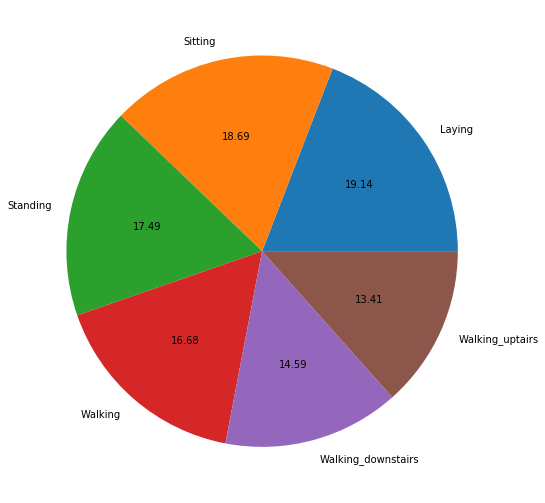

In [12]:
#Exploratory analysis to check if the classes are equally weighted
plt.figure(figsize=(12, 9))
activity_count = trainY_df['Activity'].value_counts()
activities = sorted(trainY_df['Activity'].unique())
plt.pie(activity_count, labels = activities, autopct = '%0.2f')

In [13]:
#Running the Support Vector Machine classifier on the entire dataset
svc_classifier = SVC(kernel='linear')

In [14]:
#Fitting the model
svc_classifier.fit(trainX, trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
#Computing the accuracy score
y_pred_svm = svc_classifier.predict(testX)
y_true_svm = testY
dt_accuracy_svm = accuracy_score(y_true_svm, y_pred_svm)

In [16]:
print(dt_accuracy_svm)

0.9640312181879878


In [17]:
#Confusion matrix along with the classification report 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testY, y_pred_svm))
print(classification_report(testY, y_pred_svm))

[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.98      0.96      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       491
           5       0.91      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



Text(0.5, 1, 'Confusion Matrix')

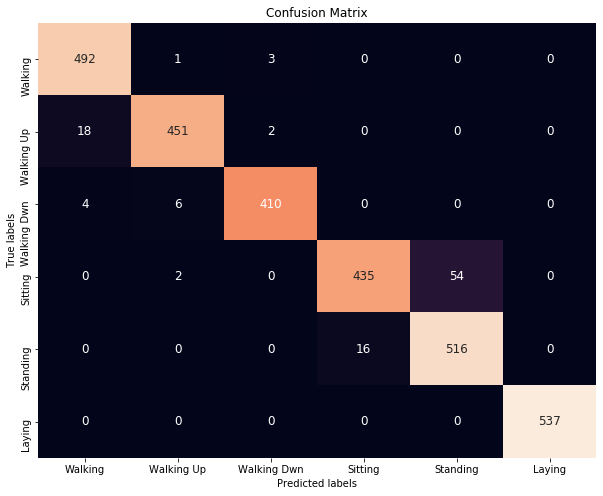

In [18]:
conf_matrix = confusion_matrix(testY, y_pred_svm)
index = ['Walking', 'Walking Up', 'Walking Dwn','Sitting', 'Standing', 'Laying']
columns = ['Walking', 'Walking Up', 'Walking Dwn','Sitting', 'Standing', 'Laying']
conf_matrix_df = pd.DataFrame(conf_matrix,index,columns)
plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(conf_matrix_df, annot=True, ax = ax,fmt='d',annot_kws={"size": 12},cbar=False); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [19]:
svc_classifier_poly = SVC(kernel='poly')

In [20]:
svc_classifier_poly.fit(trainX, trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred_svm_poly = svc_classifier_poly.predict(testX)
y_true_svm_poly = testY
dt_accuracy_svm_poly = accuracy_score(y_true_svm_poly, y_pred_svm_poly)

In [22]:
print(dt_accuracy_svm_poly)

0.9073634204275535


In [23]:
print(confusion_matrix(testY, y_pred_svm_poly))
print(classification_report(testY, y_pred_svm_poly))

[[491   0   5   0   0   0]
 [ 38 424   9   0   0   0]
 [ 54  44 322   0   0   0]
 [  0   4   0 410  77   0]
 [  0   1   0  41 490   0]
 [  0   0   0   0   0 537]]
              precision    recall  f1-score   support

           1       0.84      0.99      0.91       496
           2       0.90      0.90      0.90       471
           3       0.96      0.77      0.85       420
           4       0.91      0.84      0.87       491
           5       0.86      0.92      0.89       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.91      0.91      2947



Text(0.5, 1, 'Confusion Matrix')

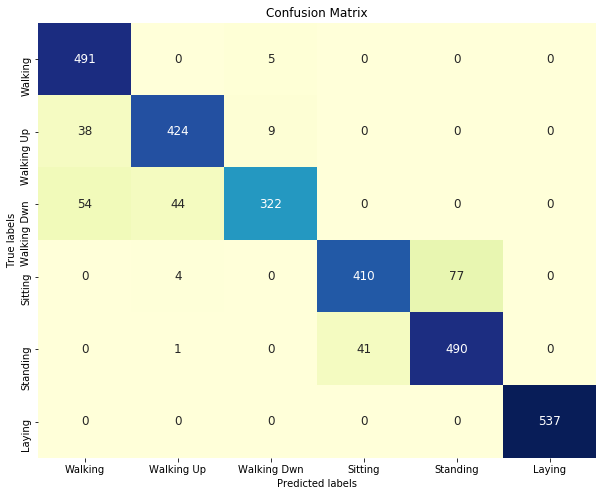

In [24]:
conf_matrix = confusion_matrix(testY, y_pred_svm_poly)
index = ['Walking', 'Walking Up', 'Walking Dwn','Sitting', 'Standing', 'Laying']
columns = ['Walking', 'Walking Up', 'Walking Dwn','Sitting', 'Standing', 'Laying']
conf_matrix_df = pd.DataFrame(conf_matrix,index,columns)
plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(conf_matrix_df, annot=True, ax = ax,fmt='d',annot_kws={"size": 12},cbar=False,cmap="YlGnBu"); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [25]:
##Running the KNN classifier on the entire dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [26]:
#Computing the accuracy score
y_pred_knn = knn.predict(testX)
y_true_knn = testY
dt_accuracy_knn = accuracy_score(y_true_knn, y_pred_knn)

In [27]:
print(dt_accuracy_knn)

0.9032914828639295


In [28]:
#Confusion matrix along with the classification report 
print(confusion_matrix(testY, y_pred_knn))
print(classification_report(testY, y_pred_knn))

[[482   3  11   0   0   0]
 [ 42 423   6   0   0   0]
 [ 48  40 332   0   0   0]
 [  0   4   0 394  93   0]
 [  0   0   0  35 497   0]
 [  0   0   0   2   1 534]]
              precision    recall  f1-score   support

           1       0.84      0.97      0.90       496
           2       0.90      0.90      0.90       471
           3       0.95      0.79      0.86       420
           4       0.91      0.80      0.85       491
           5       0.84      0.93      0.89       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



Text(0.5, 1, 'Confusion Matrix')

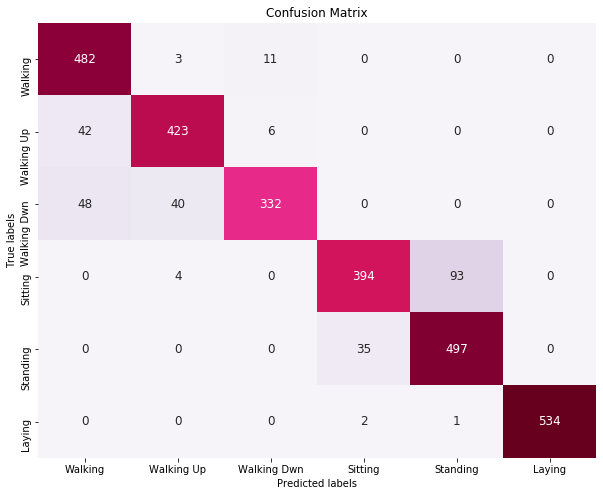

In [29]:
conf_matrix = confusion_matrix(testY, y_pred_knn)
index = ['Walking', 'Walking Up', 'Walking Dwn','Sitting', 'Standing', 'Laying']
columns = ['Walking', 'Walking Up', 'Walking Dwn','Sitting', 'Standing', 'Laying']
conf_matrix_df = pd.DataFrame(conf_matrix,index,columns)
plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(conf_matrix_df, annot=True, ax = ax,fmt='d',annot_kws={"size": 12},cbar=False,cmap="PuRd"); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

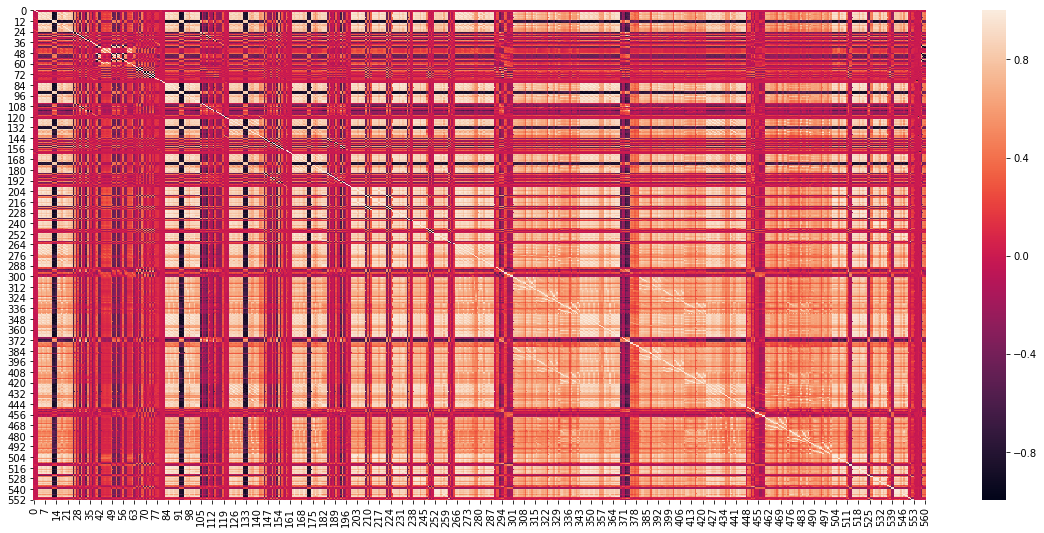

In [30]:
#Plotting the correlation between the entire feature set
plt.figure(figsize=(20, 9))
sns.heatmap(trainX_df.corr())

In [31]:
#Identifying highly correlated features i.e. features with a correlation 0.8 or more
col_corr = set()
corr_matrix = trainX_df.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) >= 0.9:
            colname = corr_matrix.columns[i]
            col_corr.add(colname)

In [32]:
print(len(col_corr))

359


In [33]:
#Removing highly correlated features from the training and testing set
trainX_df.drop(labels=col_corr, axis=1, inplace=True)
testX_df.drop(labels=col_corr, axis=1, inplace=True)

In [34]:
trainX_df.shape

(7352, 202)

In [35]:
testX_df.shape

(2947, 202)

In [36]:
#Performaing Recusive Feature Elimination with Cross Validation on the training data after removing highly correlated variables
rfecv = RFECV(estimator=svc_classifier, step=1, cv=StratifiedKFold(5), scoring='accuracy')
selector_rfecv = rfecv.fit(trainX_df, trainY)
#Only keeping the optimal features in the training set
trainX_df_rfecv = selector_rfecv.transform(trainX_df)

In [37]:
selector_rfecv.grid_scores_

array([0.43973318, 0.72332031, 0.77967386, 0.85597766, 0.87599857,
       0.88741211, 0.90277177, 0.90521235, 0.90793252, 0.90384515,
       0.89758941, 0.9003056 , 0.90139006, 0.9015287 , 0.90235437,
       0.90493968, 0.90684463, 0.91092831, 0.91119765, 0.9073907 ,
       0.90916024, 0.91065759, 0.91433578, 0.91528198, 0.91569208,
       0.91773253, 0.91786341, 0.9143247 , 0.91228286, 0.91174113,
       0.91269296, 0.91391986, 0.91704357, 0.91881246, 0.91826658,
       0.91840254, 0.91908133, 0.91826584, 0.91840374, 0.91799604,
       0.9169077 , 0.91813099, 0.91622688, 0.91731338, 0.9169066 ,
       0.91582102, 0.91881542, 0.91813358, 0.91772514, 0.91799559,
       0.91650065, 0.91459857, 0.91541286, 0.91323747, 0.91609498,
       0.91663984, 0.91868048, 0.91854452, 0.92044798, 0.92139851,
       0.92153734, 0.92466345, 0.92248714, 0.92221484, 0.92316667,
       0.92330088, 0.92316251, 0.92126025, 0.92302554, 0.92438498,
       0.92302499, 0.92356597, 0.91935087, 0.92030187, 0.92152

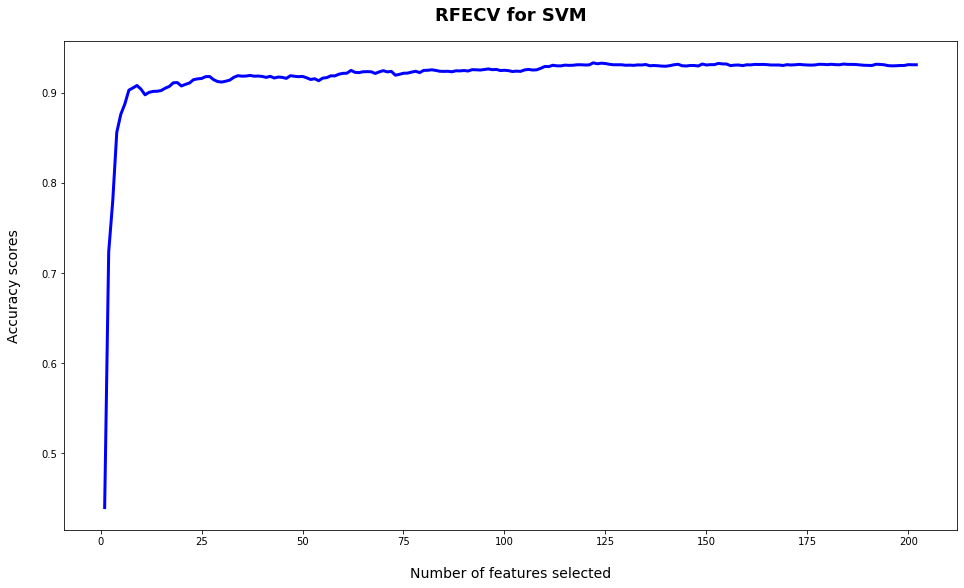

In [39]:
xs = len(selector_rfecv.grid_scores_)+1
ys = selector_rfecv.grid_scores_
plt.figure(figsize=(16, 9))
plt.title('RFECV for SVM', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Accuracy scores', fontsize=14, labelpad=20)
plt.plot(range(1, xs), ys, color='blue', linewidth=3)
plt.show()

In [40]:
#Total optimal features selected after performing RFECV
print('Total optimal features: {}'.format(selector_rfecv.n_features_))

Total optimal features: 122


In [41]:
##Only keeping the optimal features in the testing set
testX_df_rfecv = selector_rfecv.transform(testX_df)

In [42]:
#Fitting linear SVM on the transformed training set
svc_classifier.fit(trainX_df_rfecv,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
#Predicting classification accuracy on the transformed testing set
y_pred_svm_rfecv = svc_classifier.predict(testX_df_rfecv)
y_true_svm_rfecv = testY
dt_accuracy_svm_rfecv = accuracy_score(y_true_svm_rfecv, y_pred_svm_rfecv)

In [44]:
print(dt_accuracy_svm_rfecv)

0.9436715303698676


In [45]:
trainX_df_rfecv.shape

(7352, 122)

In [46]:
#Performing simple Recursive feature elemination on the 122 optomal features selected by RFECV to select 4 optimal ones  
rfe_2 = RFE(svc_classifier,n_features_to_select=4, step=1)
selector_new = rfe_2.fit(trainX_df_rfecv, trainY)
print(rfe_2.support_)
print(rfe_2.ranking_)

[False  True False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[ 77   1  11   5  20  28  32  31  43 116  48  47 100 105  25   2  81  53
   1   1  63  10  16   3  14  19  29  91   4   1  61 106  56  94 115  49
  23 111  65  60  72  79 113  46  59 117   7  30  44   9  96  22  88 112
  40  92  17  13  24  21  69  62  50 

In [47]:
#Tranforming the training and testing set to only include the 4 selected features 
trainX_df_new_2 = selector_new.transform(trainX_df_rfecv)
testX_df_new_2 = selector_new.transform(testX_df_rfecv)

In [48]:
#Fitting on SVM on the trandformed training set
svc_classifier.fit(trainX_df_new_2,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
#Predicting classification accuracy on the transformed testing set
y_pred_svm_new_2 = svc_classifier.predict(testX_df_new_2)
y_true_svm_new_2 = testY
dt_accuracy_svm_new_2 = accuracy_score(y_true_svm_new_2, y_pred_svm_new_2)

In [50]:
#Only 4 features are necessary to get an accuracy score of greater than 80% 
print(dt_accuracy_svm_new_2)

0.830335934848999


In [51]:
#Performing simple Recursive feature elemination on the 122 optomal features selected by RFECV to select 35 optimal ones
rfe_3 = RFE(svc_classifier,n_features_to_select=35, step=1)
selector_new = rfe_3.fit(trainX_df_rfecv, trainY)
print(rfe_3.support_)
print(rfe_3.ranking_)

[False  True  True  True  True  True  True  True False False False False
 False False  True  True False False  True  True False  True  True  True
  True  True  True False  True  True False False False False False False
  True False False False False False False False False False  True  True
 False  True False  True False False False False  True  True  True  True
 False False False False False  True False False  True False False False
  True False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False  True False False False False False  True
 False False]
[46  1  1  1  1  1  1  1 12 85 17 16 69 74  1  1 50 22  1  1 32  1  1  1
  1  1  1 60  1  1 30 75 25 63 84 18  1 80 34 29 41 48 82 15 28 86  1  1
 13  1 65  1 57 81  9 61  1  1  1  1 38 31 19 53 10  1 11 14  1 62 54 64
  1 55 72 44  6 43 35 40 66 33 71 21 

In [52]:
#Tranforming the training and testing set to only include the 35 selected features
trainX_df_new_3 = selector_new.transform(trainX_df_rfecv)
testX_df_new_3 = selector_new.transform(testX_df_rfecv)

In [53]:
#Fitting on SVM on the trandformed training set
svc_classifier.fit(trainX_df_new_3,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
#Predicting classification accuracy on the transformed testing set
y_pred_svm_new_3 = svc_classifier.predict(testX_df_new_3)
y_true_svm_new_3 = testY
dt_accuracy_svm_new_3 = accuracy_score(y_true_svm_new_3, y_pred_svm_new_3)

In [55]:
# 35 features are necessary to get an accuracy score of about 90%
print(dt_accuracy_svm_new_3)

0.8992195453003053
